# Aprendizaje no supervisado

- El aprendizaje no supervisado es una clases de técnicas de aprendizaje automático para **descubrir patrones no guiados en los datos**.
- Por ejemplo, encontrar los grupos naturales de cientes en función de sus historiales de compra o buscar patrones y correlaciones entre estas compras, y usar estos patrones para expresar los datos en forma comprimida. Este tipo de técnicas se las llama:
    - Agrupación 
    - Reducción de dimensiones.
 
El aprendizaje no supervisado **es un aprendizaje sin etiquetas**.

Analizaremos el conjunto de datos de iris que consta de las medidas de muchas plantas de iris de tres especies diferentes.

- Setosa
- Versicolor
- Virginica

De donde tenemos cuatro medidas como características:

- Largo del pétalo
- Ancho del pétalo
- largo del sépalo
- ancho del sépalo

La columna de la matriz se corresponderán con las características. Y las medidas para plantas individuales son las muestras del conjunto de datos que corresponden a las filas de la matriz.

Las muestras del conjunto de datos del iris tienen cuatro medidas y corresponden a puntos en un espacio de cuatro dimensiones. Estas 4 dimensiones no podemos visualizarlas directamente, pero usando técnicas de aprendizaje no supervisadas añun podemos obtener información.

## Agrupación para la exploración de conjuntos de datos

Agruparemos estas muestras utilizando **k-means clustering**. Esta técnica encuentra un número específico de grupos en las muestras.

- **k** significa la determinación de clusters y su pertenencia a cada uno.
- k-means hace esto al recordar la media de las muestras en cada grupo. A esto se le llaman **centroides**.
- Las nuevas muestras se asignan al grupo cuyo centroide está más cerca.
- 

In [25]:
# LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/iris.csv'
iris = pd.read_csv(ruta_archivo,index_col = None)
iris.head()
samples = iris.drop("species", axis = 1).values

In [24]:
# Crear un modelo kmeans, especificando la cantidad de clústers
# que se desea encontrar.
model = KMeans(n_clusters = 3, n_init = 10)

# Llamar al método de ajuste del modelo, pasando la matriz de muestras
model.fit(samples)

# Usar el método depredicción
labels = model.predict(samples)

# Imprimir una etiqueta de conglomerados para cada muestra, 
# que indica a que conglomerado pertenece una muestra
print(labels)

# Predecir para nuevos datos
new_labels = model.predict(samples)

# Imprimir
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- Visualizar scatter plots, creando un diagrama de dispersión.

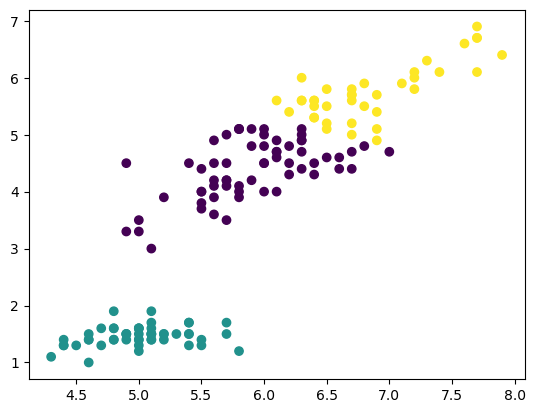

In [29]:
# Obtener coordenadas x e y de cada muestra
# La longitud de sépalo está en la columna 0 de la matriz
# La longitud del pétalo está en la columna 2
xs = samples[:,0]
ys = samples[:,2]

# Llamar a la función de dispersión de puntos plt
# c = labels colorea 
plt.scatter(xs, ys, c = labels)
plt.show()

- Dibujar otro gráfico

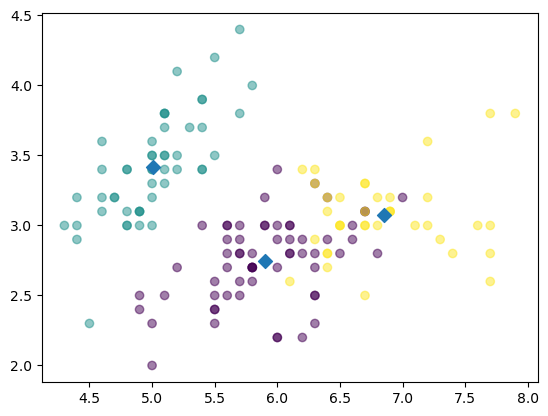

In [31]:
# Asignar las columnas de new_points: xs e ys
xs = samples[:,0]
ys = samples[:,1]

# Hacer un diagrama de dispersión de xs e ys, usando etiquetas para definir los colores
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Asignar los centros del cluster: centroides
centroids = model.cluster_centers_

# Asignar las columnas de centroides: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Hacer un diagrama de dispersión de centroids_x y centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

### Evaluando un clustering